# **MIS 311: INTRODUCTION TO BUSINESS ANALYTICS**
## Individual assignment: Portfolio Site
### **Topic: Cost of living**

### **Overview**:This dataset provides information on the cost of living and average monthly income across different countries, categorized by year and region. It allows for comparison of living standards by examining whether income levels are sufficient to cover typical living expenses. The data can be used to analyze economic conditions, evaluate affordability, and compare the purchasing power of individuals in various parts of the world.


In [6]:
# Import libraries
import pandas as pd
import numpy as np

In [7]:
np.nan

nan

In [8]:
pd.NA

<NA>

In [15]:
# Load data
cost_of_living_data = pd.read_excel("Cost of Living.xlsx")
cost_of_living_data


,Country,Year,Average_Monthly_Income,Cost_of_Living,Region
0,Australia,2013,3483.92,1106.07,Oceania
1,India,2019,7771.03,5422.78,Asia
2,Russia,2004,6991.30,3972.36,Europe
3,South Africa,2011,6628.04,6755.75,Africa
4,Brazil,2015,2434.27,2656.36,South America
...,...,...,...,...,...
196,Russia,2012,2530.59,1594.45,Europe
197,France,2014,5330.00,6038.94,Europe
198,Brazil,2020,3565.51,3649.03,South America
199,United States,2015,690.40,2031.73,North America


### **1. Checking and Handling Data Type**

In [16]:
# Check the number of rows and columns
cost_of_living_data.shape

(201, 5)

In [17]:
cost_of_living_data.dtypes

,0
Country,object
Year,int64
Average_Monthly_Income,float64
Cost_of_Living,float64
Region,object


In [18]:
# Handling the data type of "Year" column into int type
cost_of_living_data["Year"] = pd.to_numeric(cost_of_living_data.Year, errors='coerce').fillna(0).astype(int)

In [19]:
# Handling the data type of "Cost_of_Living" column into int type
cost_of_living_data["Cost_of_Living"] = pd.to_numeric(cost_of_living_data.Cost_of_Living, errors='coerce').fillna(0).astype(int)

In [20]:
# Check the result
cost_of_living_data.dtypes

,0
Country,object
Year,int64
Average_Monthly_Income,float64
Cost_of_Living,int64
Region,object


### **2. Data Cleaning**


*2.1. Identify the missing value*




Using `.isna()` method to finds out missing value

In [22]:
cost_of_living_data.isna().iloc[25:40]

,Country,Year,Average_Monthly_Income,Cost_of_Living,Region
25,False,False,False,False,False
26,False,False,False,False,False
27,False,False,False,False,False
28,False,False,False,False,False
29,False,False,False,False,False
30,False,False,False,False,False
31,False,False,False,False,False
32,False,False,False,False,False
33,False,False,False,False,False
34,False,False,False,False,False


In [23]:
# Return the missing values by column
cost_of_living_data.isna().sum()

,0
Country,0
Year,0
Average_Monthly_Income,2
Cost_of_Living,0
Region,2


*2.2. Handling Missing Data*


Use the `.dropna()` method to removes rows with missing data.

In [24]:
# Drop all rows with NaN
df = cost_of_living_data.dropna()
df

,Country,Year,Average_Monthly_Income,Cost_of_Living,Region
0,Australia,2013,3483.92,1106,Oceania
1,India,2019,7771.03,5422,Asia
2,Russia,2004,6991.30,3972,Europe
3,South Africa,2011,6628.04,6755,Africa
4,Brazil,2015,2434.27,2656,South America
...,...,...,...,...,...
196,Russia,2012,2530.59,1594,Europe
197,France,2014,5330.00,6038,Europe
198,Brazil,2020,3565.51,3649,South America
199,United States,2015,690.40,2031,North America


In [30]:
# Save data to excel file for later uses
df.to_excel("Cost of Living_1.xlsx", index=False)

*2.3. Identifying Duplicate Rows*

In [26]:
# Load data
df = pd.read_excel("Cost of Living.xlsx")
df

,Country,Year,Average_Monthly_Income,Cost_of_Living,Region
0,Australia,2013,3483.92,1106,Oceania
1,India,2019,7771.03,5422,Asia
2,Russia,2004,6991.30,3972,Europe
3,South Africa,2011,6628.04,6755,Africa
4,Brazil,2015,2434.27,2656,South America
...,...,...,...,...,...
192,Russia,2012,2530.59,1594,Europe
193,France,2014,5330.00,6038,Europe
194,Brazil,2020,3565.51,3649,South America
195,United States,2015,690.40,2031,North America


In [27]:
# Check duplicate in the dataframe
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
192,False
193,False
194,False
195,False


In [28]:
df.duplicated().value_counts()

,count
False,195
True,2


*2.4. Removing Duplicate Rows*

In [29]:
df.drop_duplicates(inplace=True)
df

,Country,Year,Average_Monthly_Income,Cost_of_Living,Region
0,Australia,2013,3483.92,1106,Oceania
1,India,2019,7771.03,5422,Asia
2,Russia,2004,6991.30,3972,Europe
3,South Africa,2011,6628.04,6755,Africa
4,Brazil,2015,2434.27,2656,South America
...,...,...,...,...,...
192,Russia,2012,2530.59,1594,Europe
193,France,2014,5330.00,6038,Europe
194,Brazil,2020,3565.51,3649,South America
195,United States,2015,690.40,2031,North America


In [32]:
# Save data to excel file for later uses
df.to_excel("Cost of Living_2.xlsx", index=False)


### **3. Descriptive Statistic**

In [33]:
import matplotlib.pyplot as plt

In [35]:
# Load data
Cost_of_Living_2 = pd.read_excel("Cost of Living_2.xlsx")
Cost_of_Living_2.head()

,Country,Year,Average_Monthly_Income,Cost_of_Living,Region
0,Australia,2013,3483.92,1106,Oceania
1,India,2019,7771.03,5422,Asia
2,Russia,2004,6991.30,3972,Europe
3,South Africa,2011,6628.04,6755,Africa
4,Brazil,2015,2434.27,2656,South America


*3.1. The 1st insight: The highest average monthly incomes.*

In [38]:
# Calculate the total income of each region
total_income_by_region = Cost_of_Living_2.groupby('Region')['Average_Monthly_Income'].sum().reset_index()
display(total_income_by_region)

,Region,Average_Monthly_Income
0,Africa,84513.33
1,Asia,196108.16
2,Europe,201476.59
3,North America,183736.69
4,Oceania,95516.18
5,South America,70233.09


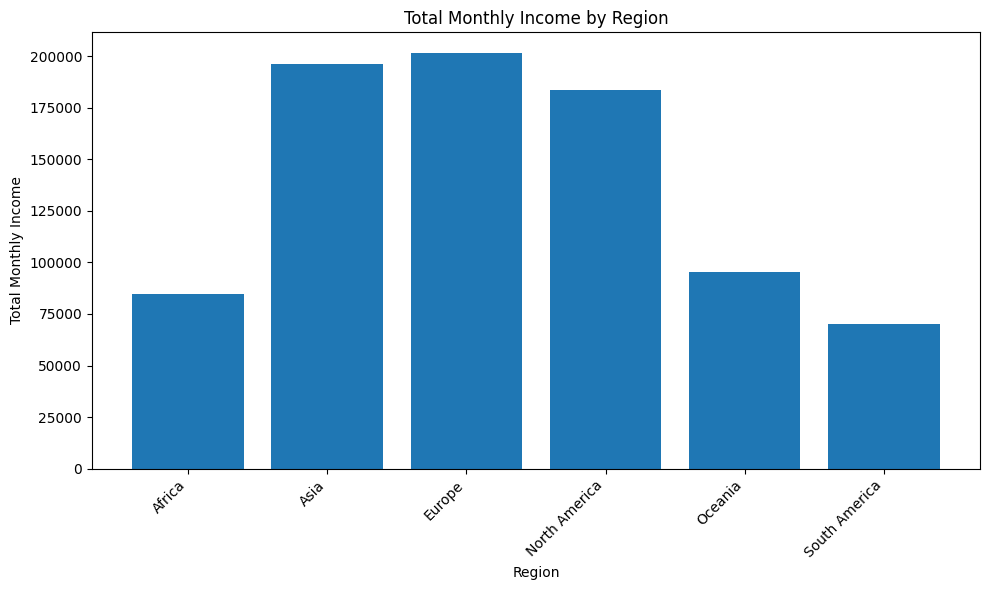

In [39]:
# Create a bar chart to visualize the total income by region
plt.figure(figsize=(10, 6))
plt.bar(total_income_by_region['Region'], total_income_by_region['Average_Monthly_Income'])
plt.xlabel('Region')
plt.ylabel('Total Monthly Income')
plt.title('Total Monthly Income by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Comment:** Based on the results of average monthly income by region, it can be seen that **Europe** and **Asia** have the highest total income, showing the concentration of many developed and economically strong countries in these two regions. While North America also has a relatively high total income, Africa and South America have lower total incomes, showing the difference in income levels and economic conditions compared to other regions. Average incomes between regions in the world have significant differences depending on the level of economic development and employment opportunities of each region.

*3.2. The 2nd insight: The percentage of cost of living by region*

In [41]:
display(total_cost_by_region)

,Region,Cost_of_Living
0,Africa,71328
1,Asia,171305
2,Europe,159922
3,North America,180803
4,Oceania,81390
5,South America,57353


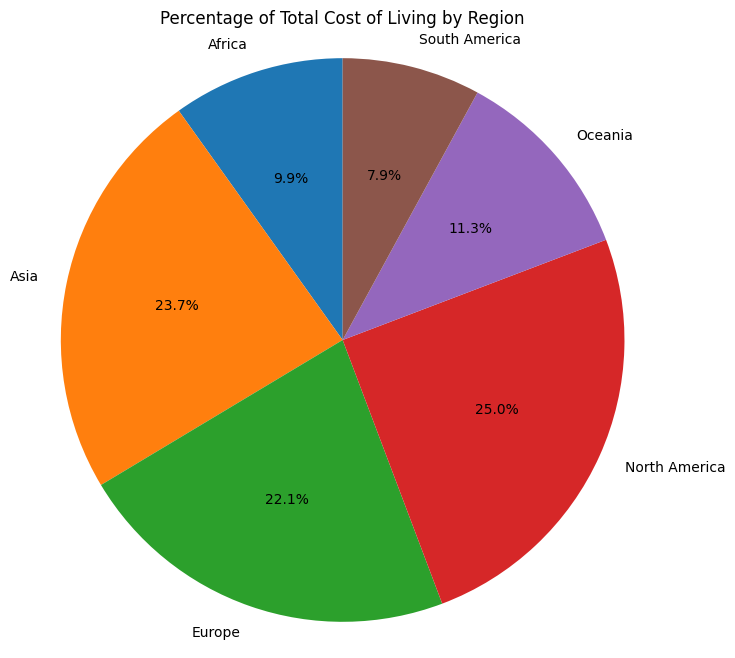

In [42]:
# Calculate the percentage of total cost of living for each region
total_cost_by_region['Percentage'] = (total_cost_by_region['Cost_of_Living'] / total_cost_by_region['Cost_of_Living'].sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_cost_by_region['Percentage'], labels=total_cost_by_region['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Cost of Living by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Comment:** It is clear from the chart above that the total cost of living is concentrated mainly in the two leading regions, **North America** (25.0%) and **Asia** (23.7%), which account for nearly half of the total cost. Europe (22.1%) accounts for the next most significant proportion. In contrast, the remaining three continents - Oceania, Africa and South America - all recorded a contribution of less than 12%. This highlights the dominant role of North America and Asia in shaping the total cost of living surveyed.